In [37]:
import matplotlib.pyplot as plt

search_data = {
    "num_entities": [10_000, 25_000, 50_000, 75_000, 100_000, 250_000, 375_000, 500_000, 625_000, 750_000, 875_000, 1_000_000],
    "Exact": [3.299, 7.551, 15.039, 21.368, 28.153, 67.784, 97.806, 129.498, 169.355, 202.125, 239.98, 281.573],
    "MultiVecHNSW": [0.627, 0.710, 0.676, 0.822, 0.935, 0.872, 1.054, 0.913, 1.582, 0.947, 1.486, 1.336],
    "HNSWRerank": [1.667, 2.227, 2.595, 3.835, 4.595, 5.001, 7.472, 6.247, 7.529, 6.696, 8.165, 8.272]
}

PLOT_DIR = "../experiments/plots"


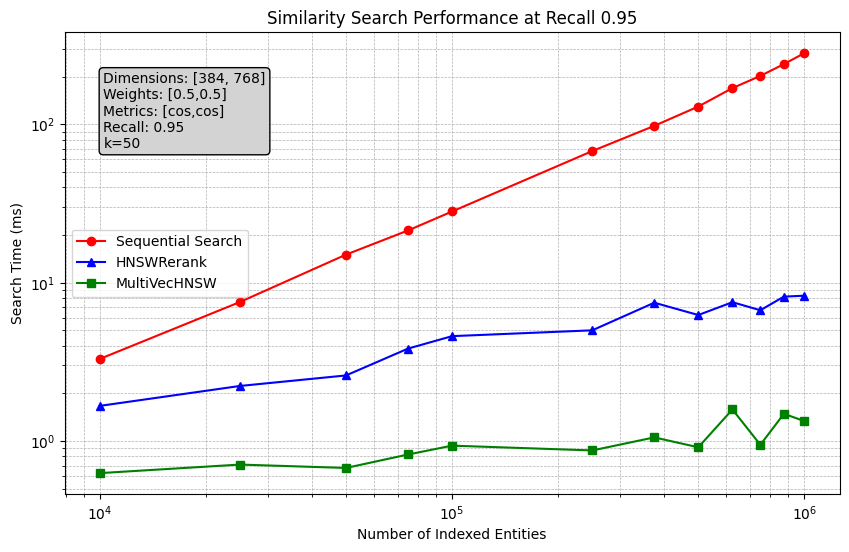

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(search_data["num_entities"], search_data["Exact"], marker='o', linestyle='-', label='Sequential Search', color='red')
plt.plot(search_data["num_entities"], search_data["HNSWRerank"], marker='^', linestyle='-', label='HNSWRerank', color='blue')
plt.plot(search_data["num_entities"], search_data["MultiVecHNSW"], marker='s', linestyle='-', label='MultiVecHNSW', color='green')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Indexed Entities')
plt.ylabel('Search Time (ms)')
plt.title('Similarity Search Performance at Recall 0.95')
plt.legend()

# info box
info_text = ("Dimensions: [384, 768]\nWeights: [0.5,0.5]\nMetrics: [cos,cos]\nRecall: 0.95\nk=50")
plt.annotate(info_text, xy=(0.05, 0.75), xycoords='axes fraction', 
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgray'))


plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# save plot
plt.savefig(f"{PLOT_DIR}/similarity_search_performance.png", dpi=300, bbox_inches='tight')

plt.show()

In [39]:
construction_data =  {
    "num_entities": [10_000, 25_000, 50_000, 75_000, 100_000, 250_000, 375_000, 500_000, 625_000, 750_000, 875_000, 1_000_000],
    "MultiVecHNSW": [12.53,42.87,89.40,142.79,197.64,551.56,855.11,1149.90,1451.46,1794.34,2297.95,2516.50],
    "HNSWRerank": [15.38,53.29,128.11,203.23,279.50,788.55,1236.82,1693.92,2173.62,2778.15,3200.51,3720.00]
}

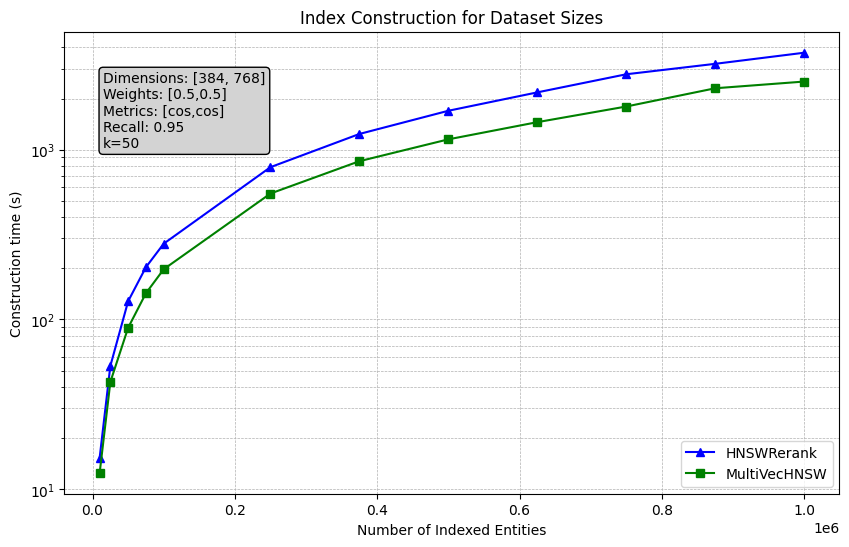

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(construction_data["num_entities"], construction_data["HNSWRerank"], marker='^', linestyle='-', label='HNSWRerank', color='blue')
plt.plot(construction_data["num_entities"], construction_data["MultiVecHNSW"], marker='s', linestyle='-', label='MultiVecHNSW', color='green')

plt.yscale('log')

plt.xlabel('Number of Indexed Entities')
plt.ylabel('Construction time (s)')
plt.title('Index Construction for Dataset Sizes')
plt.legend()

# info box
info_text = ("Dimensions: [384, 768]\nWeights: [0.5,0.5]\nMetrics: [cos,cos]\nRecall: 0.95\nk=50")
plt.annotate(info_text, xy=(0.05, 0.75), xycoords='axes fraction', 
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgray'))


plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# save plot
plt.savefig(f"{PLOT_DIR}/index_construction.png", dpi=300, bbox_inches='tight')

plt.show()